In [91]:
import warnings
warnings.simplefilter("ignore")
import pickle
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

## 1.  Data Collection

- Source: Kaggle
- Data: IBM HR Analytics dataset (synthetically generated)
  https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home
- License: 
    *  Database: https://opendatacommons.org/licenses/odbl/1.0/
    *  Contents: https://opendatacommons.org/licenses/dbcl/1.0/

#### Rule of thumb
* Know all the available dataset for the problem (database/ internet/ third party etc) . Dataset must be reliable and   authentic.
* Extract data in a format that can be used
* Required Skills for data extraction in general(mostly used and not specific to the pattern):
   - Distributed Storage: Hadoop, Apache Spark.
   - Database Management: MySQL, PostgresSQL, MongoDB.
   - Know to querying Relational Databases and retrieve unstructured Data like text, videos, audio files, documents.

#### Download dataset 

In [92]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [93]:
#Get list of columns in the dataset
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [94]:
#Dropping columns (intution)
columns = ['DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
        'Over18', 'RelationshipSatisfaction', 'StandardHours']
df.drop(columns, inplace=True, axis=1)

### 1.1 Get description of data

Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Reference link: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

In [95]:
#This will give description only for numeric fields
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [96]:
#To get description of all columns
df.describe(include = 'all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,NaN,NaN,882,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,2.721769,NaN,2.729932,2.063946,...,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,1.024165,1.093082,NaN,0.711561,1.106940,...,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,...,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,2.000000,NaN,2.000000,1.000000,...,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,3.000000,NaN,3.000000,2.000000,...,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,4.000000,NaN,3.000000,3.000000,...,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## 2. Data Cleaning

This phase is the most time consuming yet the most importat one. Here, we filter and extract only the information that is needed for problem solving. Quality of the model is highly dependant on the quality of the data that is given as an input. 
* Understand meaning of every feature and identify errors.
* Look for any missing values and find a way to fill the missing values.
* Remove duplicate or corrupted records.
* Scaling and normalization of data.
* Character encoding (string to numerical representation).
* Handle inconsistent entry.
* Use tools like pandas(python), dplyr(R), numpy.

### 2.1 Handling missing values

In [97]:
#Find number of missing values in every feature
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Looks like the best dataset!!! No null values :-)

#### But what if we have null values ???? Let's see what we can do in that case.

* Find why that data is missing. Human error or missed during extraction
* Drop missing values. 
* Some ways for filling missing values: 
  - Zero 
  - Mean ( works with normal distribution )
  - Random values from same distribution ( works well with equal distribution ) 
  - Value after missing value (make sense if data set has some logical order)

### 2.2 Encode categorical features(in string) as most of the tools works with numbers

In [98]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [99]:
#Deep copy the original data
data_encoded = df.copy(deep=True)
from sklearn import preprocessing
#Use Scikit-learn label encoding to encode character data
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [100]:
data_encoded.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,2,0,3,2,...,11,3,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,3,1,2,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,1,2,1,...,15,3,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,4,0,3,1,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,1,1,3,1,...,12,3,1,6,3,3,2,2,2,2


## 3. Data Exploration

* Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
   -  Univariate analysis 
      * Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
      * Categorical variable : Bar chart showing frequency in each category 
   -  Bivariate analysis
      * Continous & Continous : Scatter plots to know how continous variables interact with each other
      * Categorical & categorical : Stacked column chart to show how the frequencies are spread between two  
        categorical variables
      * Categorical & Continous : Boxplots, Swamplots or even bar charts
* Detect outliers
* Feature engineering 

### 3.1 Get data distribution between output classes

In [101]:
data_encoded['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

From the above result, we can find that about 82% of people stick to the company while rest of them quit :-(


**** Data is unbalanced ****

### 3.2 Finding correlation between variables

In [102]:
data_correlation = data_encoded.corr()

<AxesSubplot:>

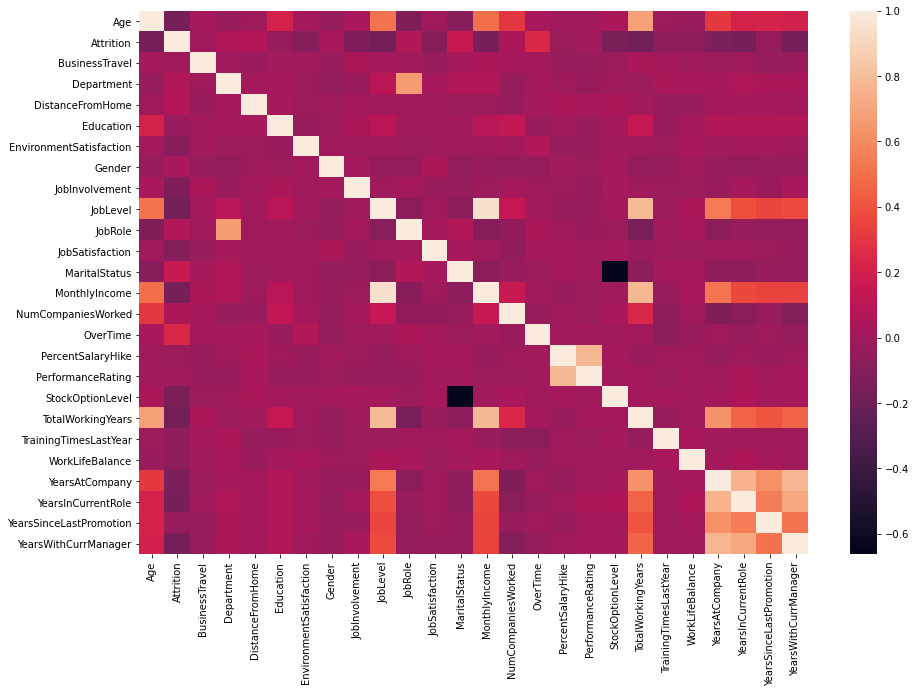

In [103]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

#### Analysis of correlation results (sample analysis)

- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

<AxesSubplot:>

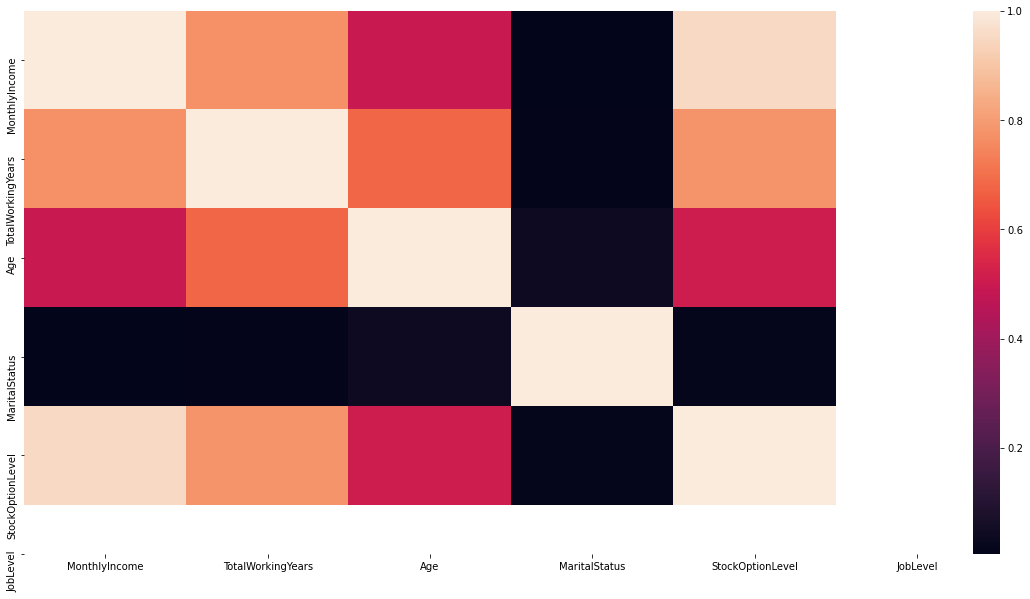

In [104]:
#Viewing the analysis obtained above 
data_corr_filtered = df[['MonthlyIncome', 'TotalWorkingYears', 'Age', 'MaritalStatus', 'StockOptionLevel',
                      'JobLevel']]
correlation = data_corr_filtered.corr()
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(correlation,xticklabels=data_corr_filtered.columns,yticklabels=data_corr_filtered.columns)

### 3.3 Understanding relationship between features and finding patterns in data through visualization

Popular data visualization libraries in python are:
     1. Matplotlib
     2. Seaborn
     3. ggplot
     4. Bokeh
     5. pygal
     6. Plotly
     7. geoplotlib
     8. Gleam
     9. missingno
     10. Leather

### 3.3.1 Age Analysis
Finding relationship between age and attrition. 

(array([  0.,  17., 309., 622., 349., 168.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

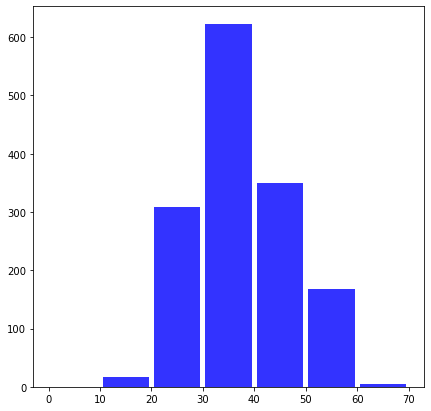

In [105]:
#Plot to see distribution of age overall
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(data_encoded['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')

#### Finding based on above plot
This plot tells that there are more employees in the range of 30 to 40. Approximately 45% of employees fall in this range.

In [106]:
#We are going to bin age (multiples of 10) to see which age group are likely to leave the company.
#Before that, let us take only employee who are likely to quit.
positive_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 1]
negative_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 0]

(array([ 0., 10., 81., 89., 34., 23.,  0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

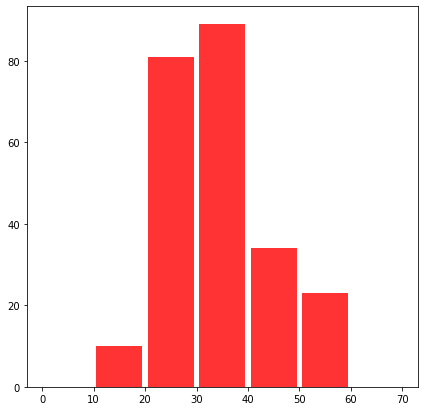

In [107]:
plt.hist(positive_attrition_df['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

#### Findings based on above plot
- Employees whose age is in the range of 30 - 40 are more likely to quit.
- Employees in the range of 20 to 30 are also equally imposing the threat to employers.

### 3.3.2 Business Travel vs Attrition
There are 3 categories in this:
    1. No travel (0).
    2. Travel Frequently (1).
    3. Travel Rarely (2).
Attrition: No = 0 and Yes = 1

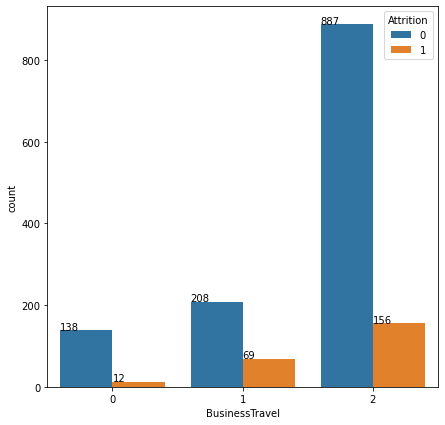

In [108]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

#### Findings
From the above plot it can be inferred that travel can not be a compelling factor for attrition. Employee who travel rarely are likely to quit more

### 3.3.3 Department Vs Attrition
There are three categories in department:
       1. Human Resources: 0
       2. Research & Development: 1
       3. Sales: 2
Attrition: No = 0 and Yes = 1

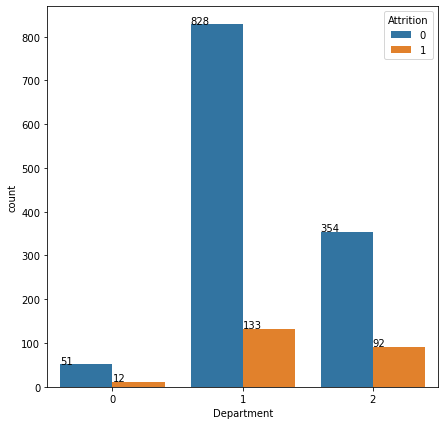

In [109]:
ax = sns.countplot(x="Department", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

#### Inference:
    1. 56% of employess from research and development department are likely to quit.
    2. 38% of employees from sales department are likely to quit.

### 3.3.4 Distance from home Vs Employee Attrition

(array([807., 246., 180.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

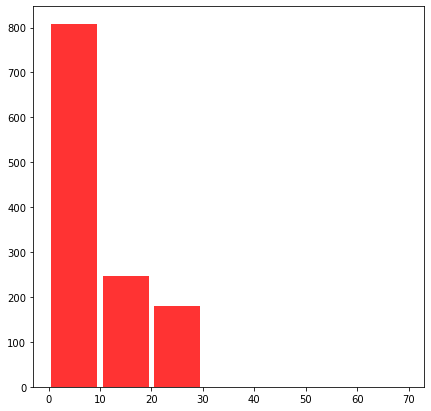

In [110]:
plt.hist(negative_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

(array([133.,  55.,  49.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <BarContainer object of 7 artists>)

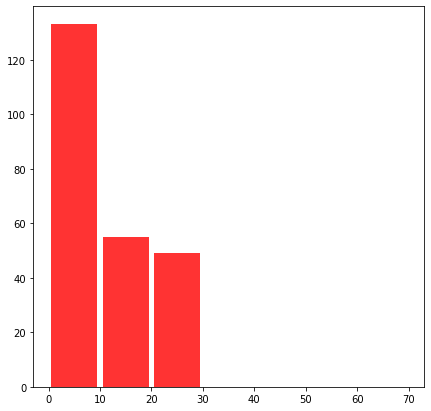

In [111]:
plt.hist(positive_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

#### Findings
People who live closeby (0-10 miles) are likely to quit more based on the data

### 3.3.5 Education vs Attrition
There are five categories: 
     1. Below College - 1 
     2. College - 2
     3. Bachelor - 3
     4. Master - 4
     5. Doctor - 5

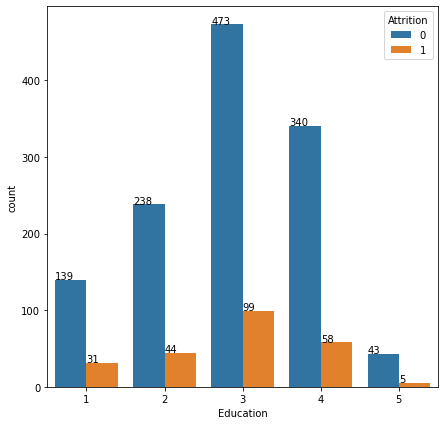

In [112]:
ax = sns.countplot(x="Education", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Inference:
    1. 41% of employees having bachelor's degree are likely to quit.
    2. 24% of employees having master's are the next in line

### 3.3.6 Gender vs Attrition

In [113]:
df_age = data_encoded.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4

In [114]:
df_age = pd.DataFrame({'count': df_age.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_age['Gender-attrition'] = df_age['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [115]:
df_age

,Gender,Attrition,count,Gender-attrition
0,0,0,501,0-0
1,0,1,87,0-1
2,1,0,732,1-0
3,1,1,150,1-1


Here,

* Gender - 0 and Attrition - 0 ===> Female employees who will stay
* Gender - 0 and Attrition - 1 ===> Female employees who will leave
* Gender - 1 and Attrition - 0 ===> Male employees who will stay
* Gender - 1 and Attrition - 1 ===> Male employees who will leave

In [116]:
# x and y axes
Gender_Attrition = df_age['Gender-attrition'].tolist()
count = df_age['count'].tolist()

print(count)

# Bokeh's mapping of column names and data lists
source = ColumnDataSource(data=dict(Gender_Attrition=Gender_Attrition, count=count, color=Viridis5))

plot_bar = figure(x_range=Gender_Attrition, plot_height=350, title="Counts")

# Render and show the vbar plot
plot_bar.vbar(x='Gender_Attrition', top='count', width=0.9, color='color', source=source)
show(plot_bar)


[501, 87, 732, 150]


NameError: name 'ColumnDataSource' is not defined

#### Findings

From the above plot, we can infer that male employees are likely to leave organization as they amount to 63% compared to female who have 36 % attrition rate.

### 3.3.7 Job Role Vs Attrition

Categories in job role:
* Healthcare Representative : 0 
* Human Resources : 1
* Laboratory Technician : 2
* Manager : 3 
* Manufacturing Director : 4
* Research Director : 5
* Research Scientist : 6
* Sales Executive : 7 
* Sales Representative : 8

In [117]:
df_jrole = pd.DataFrame({'count': data_encoded.groupby(["JobRole", "Attrition"]).size()}).reset_index()

In [118]:
#Considering attrition case
df_jrole_1 = df_jrole.loc[df_jrole['Attrition'] == 1]

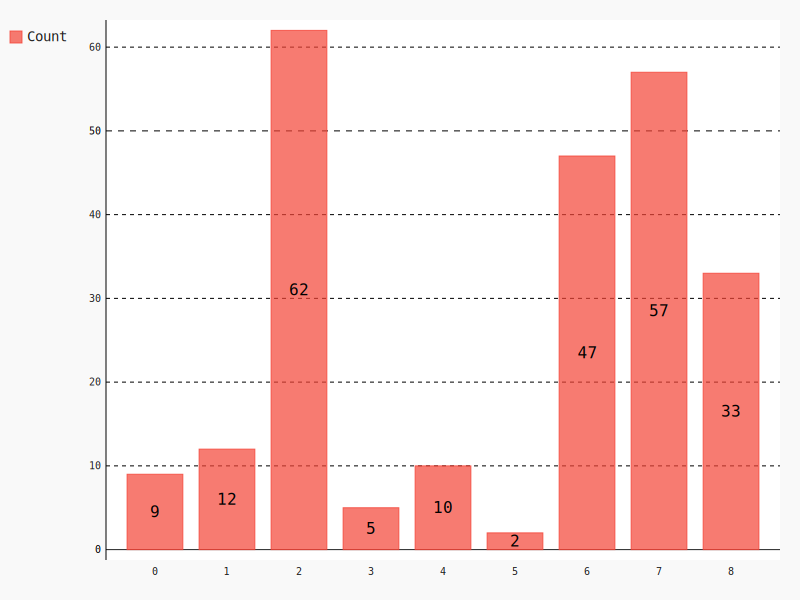

In [119]:
import pygal
from IPython.display import SVG, display
chart = pygal.Bar(print_values=True)
chart.x_labels = map(str, range(0,9))
chart.add('Count', df_jrole_1['count'])
#chart.render()
display(SVG(chart.render(disable_xml_declaration=True)))

#### Findings:
Top three roles facing attrition
- 26% of employees who are likely to quit belong to Laboratory Technician group
- 24% of employees belong to Sales Executive group
- 19% of employees belong to Research Scientist group

### 3.3.8 Marital Status vs Attrition

Categories:
    1. 'Divorced': 0
    2. 'Married' : 1
    3. 'Single'  : 2

In [120]:
#analyzing employees who has positive attrition
init_notebook_mode(connected=True)
cf.go_offline()
positive_attrition_df['MaritalStatus'].value_counts().iplot(kind='bar')

NameError: name 'init_notebook_mode' is not defined

#### Inference:
Nearly 50 % of the employees who are single are likely to quit

### 3.3.9 Monthly Income vs Attrition

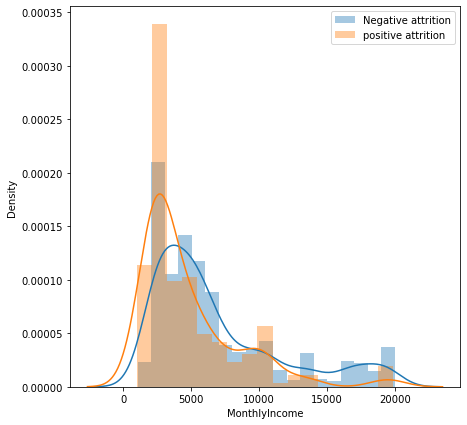

In [121]:
sns.distplot(negative_attrition_df['MonthlyIncome'], label='Negative attrition')
sns.distplot(positive_attrition_df['MonthlyIncome'], label='positive attrition')
plt.legend()

Inference:
    Looks like people who are less likely to leave the company are the ones who are less paid.

## 4. Model Development

## 4.1 Extracting label from input data

In [122]:
input_data = data_encoded.drop(['Attrition'], axis=1)

In [123]:
input_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,2,1,2,2,0,3,2,7,...,11,3,0,8,0,1,6,4,0,5
1,49,1,1,8,1,3,1,2,2,6,...,23,4,1,10,3,3,10,7,1,7
2,37,2,1,2,2,4,1,2,1,2,...,15,3,0,7,3,3,0,0,0,0
3,33,1,1,3,4,4,0,3,1,6,...,11,3,0,8,3,3,8,7,3,0
4,27,2,1,2,1,1,1,3,1,2,...,12,3,1,6,3,3,2,2,2,2


In [124]:
target_data = data_encoded[['Attrition']]

In [125]:
target_data.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [126]:
len(input_data.columns)

25

## 4.2 Feature Selection

It is the process of choosing the best features that can be used in the predictive modeling. 

1. Fight against the curse of dimensionality.
2. Reduce the overall training time.
3. Defense against overfitting.
4. Increase model generalizability.

Some of the feature selection methods are,
1. Filter methods
   - F Test
   - Mutual information
   - Variance threshold
   - Chi Square
   - Correlation coefficient 
   - ANNOVA
   - LDA
2. Wrapper methods
   - Forward search
   - Backward selection
   - Recursive feature elimination
3. Embedded methods
   - LASSO Linear Regression

In [127]:
input_data.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [128]:
col_values = list(input_data.columns.values)

#### Mutual Information
It measures the dependence of one variable to another. If,

* Mutual information is 0, then variable X carries no information about the variable Y. X and Y are independent.
* Mutual information is 1, then variable X can be determined from variable Y. X and Y are dependent.

Features can be selected based on their mutual information value.

In [129]:
#gives top 10 features having maximum mutual information value
from sklearn.feature_selection import mutual_info_classif
feature_scores = mutual_info_classif(input_data, target_data)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

JobRole 0.042689974751346504
Age 0.03839835190610352
MonthlyIncome 0.03139949296199629
StockOptionLevel 0.028065889097465657
YearsWithCurrManager 0.023099571614338288
JobLevel 0.021580339520346214
PercentSalaryHike 0.02011419204436571
TotalWorkingYears 0.017376840745060074
YearsAtCompany 0.016863728808653056
OverTime 0.010780626557495232


#### chi-square

chi-square test is applied to test the independence of two events. This method is used to evaluate the likelihood of correlation or association between features using their frequency distribution. This works best with categorial features.

In [130]:
#gives top 10 features having maximum chi-square value
from sklearn.feature_selection import chi2
feature_scores = chi2(input_data, target_data)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:10]:
    print(fname, score)

MonthlyIncome 127922.29369381821
TotalWorkingYears 230.72161773754925
YearsAtCompany 142.10005430324915
YearsInCurrentRole 117.5225958913567
YearsWithCurrManager 110.6715338985734
Age 84.15527681001525
OverTime 63.84506671452294
DistanceFromHome 63.77214163101213
StockOptionLevel 25.26882603175403
JobLevel 24.93924234571862


In [131]:
df.shape

(1470, 26)

In [132]:
#column selection based on feature selection 
data_selected = df[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'StockOptionLevel',
                      'JobLevel', 'JobRole', 'WorkLifeBalance', 'Gender', 'Attrition']]

In [133]:
data_selected.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender,Attrition
0,5993,8,6,4,5,41,Yes,1,0,2,Sales Executive,1,Female,Yes
1,5130,10,10,7,7,49,No,8,1,2,Research Scientist,3,Male,No
2,2090,7,0,0,0,37,Yes,2,0,1,Laboratory Technician,3,Male,Yes
3,2909,8,8,7,0,33,Yes,3,0,1,Research Scientist,3,Female,No
4,3468,6,2,2,2,27,No,2,1,1,Laboratory Technician,3,Male,No


In [134]:
len(data_selected.columns)

14

In [135]:
data_selected.shape

(1470, 14)

In [136]:
#encoding labels
data_selected.loc[data_selected.Attrition == 'No', 'Attrition'] = 0
data_selected.loc[data_selected.Attrition == 'Yes', 'Attrition'] = 1

In [137]:
data_selected.head()

,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime,DistanceFromHome,StockOptionLevel,JobLevel,JobRole,WorkLifeBalance,Gender,Attrition
0,5993,8,6,4,5,41,Yes,1,0,2,Sales Executive,1,Female,1
1,5130,10,10,7,7,49,No,8,1,2,Research Scientist,3,Male,0
2,2090,7,0,0,0,37,Yes,2,0,1,Laboratory Technician,3,Male,1
3,2909,8,8,7,0,33,Yes,3,0,1,Research Scientist,3,Female,0
4,3468,6,2,2,2,27,No,2,1,1,Laboratory Technician,3,Male,0


In [138]:
input_data = data_selected.drop(['Attrition'], axis=1)
target_data = data_selected[['Attrition']]

In [139]:
data_selected.shape

(1470, 14)

#### Get Train, Validation and test data

In [140]:
input_data = data_selected[0:1269]
print('Shape of the input data is ', input_data.shape)
input_data['Attrition'].value_counts()

Shape of the input data is  (1269, 14)


0    1061
1     208
Name: Attrition, dtype: int64

In [156]:
validation_data = data_selected[1269:1469]
print('Shape of the validation data is ', validation_data.shape)
validation_input_data = validation_data.drop(['Attrition'], axis=1)
print('Shape of the validation input data is ', validation_input_data.shape)
validation_target_data = validation_data[['Attrition']]
print('Shape of the validation target data is ', validation_target_data.shape)

Shape of the validation data is  (200, 14)
Shape of the validation input data is  (200, 13)
Shape of the validation target data is  (200, 1)


In [157]:
#Using 1 sample as test data to check deployment
test_data = data_selected[1469:]
print(test_data)
print('Shape of the test data is ', test_data.shape)
test_input_data = test_data.drop(['Attrition'], axis=1)
print('Shape of the test input data is ', test_input_data.shape)
test_target_data = test_data[['Attrition']]
print('Shape of the test target data is ', test_target_data.shape)

      MonthlyIncome  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
1469           4404                  6               4                   3   

      YearsWithCurrManager  Age OverTime  DistanceFromHome  StockOptionLevel  \
1469                     2   34       No                 8                 0   

      JobLevel                JobRole  WorkLifeBalance Gender Attrition  
1469         2  Laboratory Technician                4   Male         0  
Shape of the test data is  (1, 14)
Shape of the test input data is  (1, 13)
Shape of the test target data is  (1, 1)
